### Testing myConvexHull
### Aloysius Gilang Pramudya 
### 13520147

File Ipynb diperuntukan untuk mempermudah melakukan testing pada dataset tertentu
Untuk menjalankan visualizer pilih salah satu cell kemudian klik Run

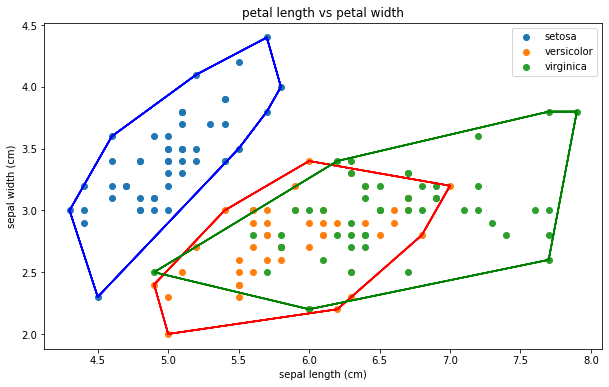

In [4]:
# TESTING DATASET IRIS (Petal length vs petal width)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
data = datasets.load_iris() 
import numpy as np
import numpy.linalg as nl

def PointToLineDis(p1,p2,p3):
    p1 = np.asfarray(p1)
    p2 = np.asfarray(p2)
    p3 = np.asfarray(p3)
    d = nl.norm(np.cross(p2-p1, p1-p3))/nl.norm(p2-p1)
    return d

def sortPoints(list):
    return sorted(list , key=lambda x: [x[0], x[1]])

def sortPointsR(list):
    return sorted(list , key=lambda x: [x[0], x[1]], reverse=True)

def determinan(point, min_e, max_e):
    x1 = max_e[0] ; y1 = max_e[1] ; x2 = min_e[0] ; y2 = min_e[1] ; x3 = point[0] ; y3 = point[1]
    D = (x1*y2) + (x3*y1) + (x2*y3) - (x3*y2) - (x2*y1) - (x1*y3) 
    return D

def PointToLineDis(p1,p2,p3):
    p1 = np.asfarray(p1)
    p2 = np.asfarray(p2)
    p3 = np.asfarray(p3)
    d = nl.norm(np.cross(p2-p1, p1-p3))/nl.norm(p2-p1)
    return d

def sortPoints(list):
    return sorted(list , key=lambda x: [x[0], x[1]])

def sortPointsR(list):
    return sorted(list , key=lambda x: [x[0], x[1]], reverse=True)

def determinan(point, min_e, max_e):
    x1 = max_e[0] ; y1 = max_e[1] ; x2 = min_e[0] ; y2 = min_e[1] ; x3 = point[0] ; y3 = point[1]
    D = (x1*y2) + (x3*y1) + (x2*y3) - (x3*y2) - (x2*y1) - (x1*y3) 
    return D
    

def DAC (list, min_e, max_e):       #return list of outermost point

    # basis
    if len(list) == 0:
        return []
    elif len(list) == 1 : 
        if PointToLineDis(min_e,max_e,list) == 0.0 :
            return []
        else : return list
    else : 
        max_distance = 0
        for point in list:
            d = PointToLineDis(min_e,max_e,point)
            if d > max_distance :
                max_distance = d
                new_max = point

        S1 = [] ; S2 = [] ; S = []

        for point in list :
            if determinan(point, min_e, new_max) < -0.1e-5 : # ubah jadi <, add error
                    S1.append(point)
            elif determinan(point,new_max,max_e) < -0.1e-5 :
                    S2.append(point)

        S.extend(DAC(S1,min_e,new_max))
        S.extend([new_max])                 #pindah diantara s1 dan s2
        S.extend(DAC(S2,new_max,max_e))
        return S

def DAC2 (list, min_e, max_e):       #return list of outermost point

    # basis
    if len(list) == 0:
        return []
    elif len(list) == 1 : 
        if PointToLineDis(min_e,max_e,list) == 0.0 :
            return []
        else : return list
    else : 
        max_distance = 0
        for point in list:
            d = PointToLineDis(min_e,max_e,point)
            if d > max_distance :
                max_distance = d
                new_max = point

        S1 = [] ; S2 = [] ; S = []

        for point in list :
            if determinan(point, min_e, new_max) > 0.1e-5 :
                    S1.append(point)
            elif determinan(point,new_max,max_e) > 0.1e-5 :
                    S2.append(point)

        S.extend(DAC2(S1,min_e,new_max))
        S.extend([new_max])
        S.extend(DAC2(S2,new_max,max_e))
        
        return S



def myConvexHull (list):
    list = sortPoints(list)
    min_extreme = min(list, key=lambda x: [x[0], x[1]])
    max_extreme = max(list, key=lambda x: [x[0], x[1]])
    S1 = [] ; S2 = [] ; S = []
    for point in list :
            if determinan(point, min_extreme, max_extreme) > 0.1e-5 :
                    S2.append(point)
            elif determinan(point,min_extreme,max_extreme) < -0.1e-5 :
                    S1.append(point)

    S.extend([min_extreme])
    S.extend(sortPoints(DAC(S1, min_extreme,max_extreme)))
    S.extend([max_extreme])
    S.extend(sortPointsR((DAC2(S2, min_extreme,max_extreme))))
    S.extend([min_extreme])
    return S

df = pd.DataFrame(data.data, columns=data.feature_names) 
df['Target'] = pd.DataFrame(data.target)
df.head()


#visualisasi hasil ConvexHull
import matplotlib.pyplot as plt
from scipy.spatial import ConvexHull
plt.figure(figsize = (10, 6))
colors = ['b','r','g']
plt.title('petal length vs petal width')
plt.xlabel(data.feature_names[0])           # axis point 
plt.ylabel(data.feature_names[1])           # ordinate
for i in range(len(data.target_names)):     # akan ada 3 convex hull karena target[0..2]
    bucket = df[df['Target'] == i]          # pembagian data berdasarkan target
    bucket = bucket.iloc[:,[0,1]].values    # return 2d array [[a,b]] from attribute Petal width and Petal length 
    hull = myConvexHull(bucket) #bagian ini diganti dengan hasil implementasi ConvexHull Divide & Conquer
    plt.scatter(bucket[:, 0], bucket[:, 1], label=data.target_names[i]) 
    x = [x[0] for x in hull]
    y = [x[1] for x in hull]
    for simplex in hull:          # visualizing convex hull
        plt.plot(x, y, colors[i]) 
plt.legend()

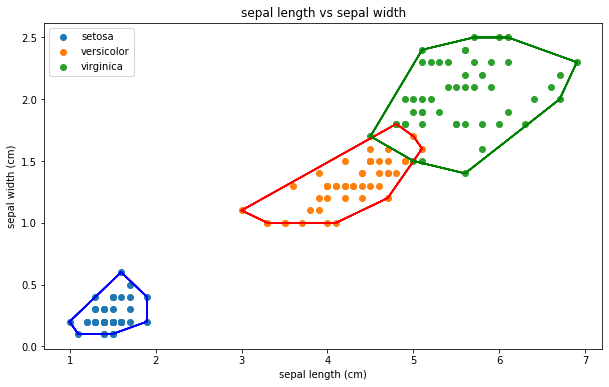

In [3]:
# TESTING DATASET IRIS (Sepal length vs sepal width)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
data = datasets.load_iris() 
import numpy as np
import numpy.linalg as nl

def PointToLineDis(p1,p2,p3):
    p1 = np.asfarray(p1)
    p2 = np.asfarray(p2)
    p3 = np.asfarray(p3)
    d = nl.norm(np.cross(p2-p1, p1-p3))/nl.norm(p2-p1)
    return d

def sortPoints(list):
    return sorted(list , key=lambda x: [x[0], x[1]])

def sortPointsR(list):
    return sorted(list , key=lambda x: [x[0], x[1]], reverse=True)

def determinan(point, min_e, max_e):
    x1 = max_e[0] ; y1 = max_e[1] ; x2 = min_e[0] ; y2 = min_e[1] ; x3 = point[0] ; y3 = point[1]
    D = (x1*y2) + (x3*y1) + (x2*y3) - (x3*y2) - (x2*y1) - (x1*y3) 
    return D

def PointToLineDis(p1,p2,p3):
    p1 = np.asfarray(p1)
    p2 = np.asfarray(p2)
    p3 = np.asfarray(p3)
    d = nl.norm(np.cross(p2-p1, p1-p3))/nl.norm(p2-p1)
    return d

def sortPoints(list):
    return sorted(list , key=lambda x: [x[0], x[1]])

def sortPointsR(list):
    return sorted(list , key=lambda x: [x[0], x[1]], reverse=True)

def determinan(point, min_e, max_e):
    x1 = max_e[0] ; y1 = max_e[1] ; x2 = min_e[0] ; y2 = min_e[1] ; x3 = point[0] ; y3 = point[1]
    D = (x1*y2) + (x3*y1) + (x2*y3) - (x3*y2) - (x2*y1) - (x1*y3) 
    return D
    
#print(determinan([1,1],[0,3],[3,0]))

def DAC (list, min_e, max_e):       #return list of outermost point

    # basis
    if len(list) == 0:
        return []
    elif len(list) == 1 : 
        if PointToLineDis(min_e,max_e,list) == 0.0 :
            return []
        else : return list
    else : 
        max_distance = 0
        for point in list:
            d = PointToLineDis(min_e,max_e,point)
            if d > max_distance :
                max_distance = d
                new_max = point

        S1 = [] ; S2 = [] ; S = []

        for point in list :
            if determinan(point, min_e, new_max) < -0.1e-5 : # ubah jadi <, add error
                    S1.append(point)
            elif determinan(point,new_max,max_e) < -0.1e-5 :
                    S2.append(point)

        S.extend(DAC(S1,min_e,new_max))
        S.extend([new_max])                 #pindah diantara s1 dan s2
        S.extend(DAC(S2,new_max,max_e))
        return S

def DAC2 (list, min_e, max_e):       #return list of outermost point

    # basis
    if len(list) == 0:
        return []
    elif len(list) == 1 : 
        if PointToLineDis(min_e,max_e,list) == 0.0 :
            return []
        else : return list
    else : 
        max_distance = 0
        for point in list:
            d = PointToLineDis(min_e,max_e,point)
            if d > max_distance :
                max_distance = d
                new_max = point

        S1 = [] ; S2 = [] ; S = []

        for point in list :
            if determinan(point, min_e, new_max) > 0.1e-5 :
                    S1.append(point)
            elif determinan(point,new_max,max_e) > 0.1e-5 :
                    S2.append(point)

        S.extend(DAC2(S1,min_e,new_max))
        S.extend([new_max])
        S.extend(DAC2(S2,new_max,max_e))
        
        return S



def myConvexHull (list):
    list = sortPoints(list)
    min_extreme = min(list, key=lambda x: [x[0], x[1]])
    max_extreme = max(list, key=lambda x: [x[0], x[1]])
    S1 = [] ; S2 = [] ; S = []
    for point in list :
            if determinan(point, min_extreme, max_extreme) > 0.1e-5 :
                    S2.append(point)
            elif determinan(point,min_extreme,max_extreme) < -0.1e-5 :
                    S1.append(point)

    S.extend([min_extreme])
    S.extend(sortPoints(DAC(S1, min_extreme,max_extreme)))
    S.extend([max_extreme])
    S.extend(sortPointsR((DAC2(S2, min_extreme,max_extreme))))
    S.extend([min_extreme])
    return S

df = pd.DataFrame(data.data, columns=data.feature_names) 
df['Target'] = pd.DataFrame(data.target)
df.head()


#visualisasi hasil ConvexHull
import matplotlib.pyplot as plt
from scipy.spatial import ConvexHull
plt.figure(figsize = (10, 6))
colors = ['b','r','g']
plt.title('sepal length vs sepal width')
plt.xlabel(data.feature_names[0])           # axis point 
plt.ylabel(data.feature_names[1])           # ordinate
for i in range(len(data.target_names)):     # akan ada 3 convex hull karena target[0..2]
    bucket = df[df['Target'] == i]          # pembagian data berdasarkan target
    bucket = bucket.iloc[:,[2,3]].values    # return 2d array [[a,b]] from attribute Petal width and Petal length 
    hull = myConvexHull(bucket) #bagian ini diganti dengan hasil implementasi ConvexHull Divide & Conquer
    plt.scatter(bucket[:, 0], bucket[:, 1], label=data.target_names[i]) 
    x = [x[0] for x in hull]
    y = [x[1] for x in hull]
    for simplex in hull:          # visualizing convex hull
        plt.plot(x, y, colors[i]) 
plt.legend()

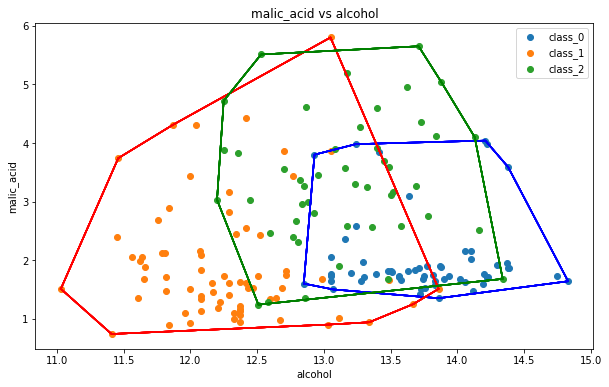

In [5]:
# TESTING DATASET WINE (Alcohol VS )
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
data = datasets.load_wine() 
import numpy as np
import numpy.linalg as nl

def PointToLineDis(p1,p2,p3):
    p1 = np.asfarray(p1)
    p2 = np.asfarray(p2)
    p3 = np.asfarray(p3)
    d = nl.norm(np.cross(p2-p1, p1-p3))/nl.norm(p2-p1)
    return d

def sortPoints(list):
    return sorted(list , key=lambda x: [x[0], x[1]])

def sortPointsR(list):
    return sorted(list , key=lambda x: [x[0], x[1]], reverse=True)

def determinan(point, min_e, max_e):
    x1 = max_e[0] ; y1 = max_e[1] ; x2 = min_e[0] ; y2 = min_e[1] ; x3 = point[0] ; y3 = point[1]
    D = (x1*y2) + (x3*y1) + (x2*y3) - (x3*y2) - (x2*y1) - (x1*y3) 
    return D

def PointToLineDis(p1,p2,p3):
    p1 = np.asfarray(p1)
    p2 = np.asfarray(p2)
    p3 = np.asfarray(p3)
    d = nl.norm(np.cross(p2-p1, p1-p3))/nl.norm(p2-p1)
    return d

def sortPoints(list):
    return sorted(list , key=lambda x: [x[0], x[1]])

def sortPointsR(list):
    return sorted(list , key=lambda x: [x[0], x[1]], reverse=True)

def determinan(point, min_e, max_e):
    x1 = max_e[0] ; y1 = max_e[1] ; x2 = min_e[0] ; y2 = min_e[1] ; x3 = point[0] ; y3 = point[1]
    D = (x1*y2) + (x3*y1) + (x2*y3) - (x3*y2) - (x2*y1) - (x1*y3) 
    return D
    

def DAC (list, min_e, max_e):       #return list of outermost point

    # basis
    if len(list) == 0:
        return []
    elif len(list) == 1 : 
        if PointToLineDis(min_e,max_e,list) == 0.0 :
            return []
        else : return list
    else : 
        max_distance = 0
        for point in list:
            d = PointToLineDis(min_e,max_e,point)
            if d > max_distance :
                max_distance = d
                new_max = point

        S1 = [] ; S2 = [] ; S = []

        for point in list :
            if determinan(point, min_e, new_max) < -0.1e-5 : # ubah jadi <, add error
                    S1.append(point)
            elif determinan(point,new_max,max_e) < -0.1e-5 :
                    S2.append(point)

        S.extend(DAC(S1,min_e,new_max))
        S.extend([new_max])                 #pindah diantara s1 dan s2
        S.extend(DAC(S2,new_max,max_e))
        return S

def DAC2 (list, min_e, max_e):       #return list of outermost point

    # basis
    if len(list) == 0:
        return []
    elif len(list) == 1 : 
        if PointToLineDis(min_e,max_e,list) == 0.0 :
            return []
        else : return list
    else : 
        max_distance = 0
        for point in list:
            d = PointToLineDis(min_e,max_e,point)
            if d > max_distance :
                max_distance = d
                new_max = point

        S1 = [] ; S2 = [] ; S = []

        for point in list :
            if determinan(point, min_e, new_max) > 0.1e-5 :
                    S1.append(point)
            elif determinan(point,new_max,max_e) > 0.1e-5 :
                    S2.append(point)

        S.extend(DAC2(S1,min_e,new_max))
        S.extend([new_max])
        S.extend(DAC2(S2,new_max,max_e))
        
        return S



def myConvexHull (list):
    list = sortPoints(list)
    min_extreme = min(list, key=lambda x: [x[0], x[1]])
    max_extreme = max(list, key=lambda x: [x[0], x[1]])
    S1 = [] ; S2 = [] ; S = []
    for point in list :
            if determinan(point, min_extreme, max_extreme) > 0.1e-5 :
                    S2.append(point)
            elif determinan(point,min_extreme,max_extreme) < -0.1e-5 :
                    S1.append(point)

    S.extend([min_extreme])
    S.extend(sortPoints(DAC(S1, min_extreme,max_extreme)))
    S.extend([max_extreme])
    S.extend(sortPointsR((DAC2(S2, min_extreme,max_extreme))))
    S.extend([min_extreme])
    return S

df = pd.DataFrame(data.data, columns=data.feature_names) 
df['Target'] = pd.DataFrame(data.target)
df.head()


#visualisasi hasil ConvexHull
import matplotlib.pyplot as plt
from scipy.spatial import ConvexHull
plt.figure(figsize = (10, 6))
colors = ['b','r','g']
plt.title('malic_acid vs alcohol')
plt.xlabel(data.feature_names[0])           # axis point 
plt.ylabel(data.feature_names[1])           # ordinate
for i in range(len(data.target_names)):     # akan ada 3 convex hull karena target[0..2]
    bucket = df[df['Target'] == i]          # pembagian data berdasarkan target
    bucket = bucket.iloc[:,[0,1]].values    # return 2d array [[a,b]] from attribute Petal width and Petal length 
    hull = myConvexHull(bucket) #bagian ini diganti dengan hasil implementasi ConvexHull Divide & Conquer
    plt.scatter(bucket[:, 0], bucket[:, 1], label=data.target_names[i]) 
    x = [x[0] for x in hull]
    y = [x[1] for x in hull]
    for simplex in hull:          # visualizing convex hull
        plt.plot(x, y, colors[i]) 
plt.legend()

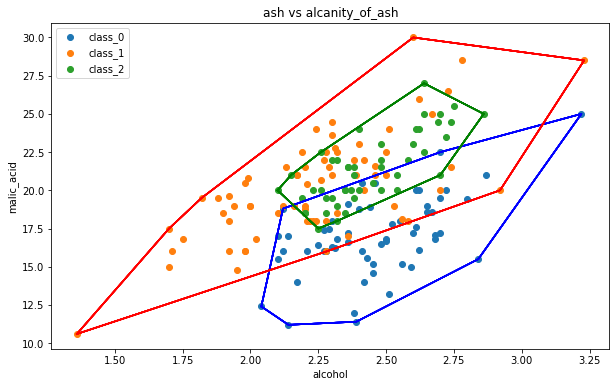

In [1]:
# TESTING DATASET WINE (ASH VS ALCANITY_OF_ASH)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
data = datasets.load_wine() 
import numpy as np
import numpy.linalg as nl

def PointToLineDis(p1,p2,p3):
    p1 = np.asfarray(p1)
    p2 = np.asfarray(p2)
    p3 = np.asfarray(p3)
    d = nl.norm(np.cross(p2-p1, p1-p3))/nl.norm(p2-p1)
    return d

def sortPoints(list):
    return sorted(list , key=lambda x: [x[0], x[1]])

def sortPointsR(list):
    return sorted(list , key=lambda x: [x[0], x[1]], reverse=True)

def determinan(point, min_e, max_e):
    x1 = max_e[0] ; y1 = max_e[1] ; x2 = min_e[0] ; y2 = min_e[1] ; x3 = point[0] ; y3 = point[1]
    D = (x1*y2) + (x3*y1) + (x2*y3) - (x3*y2) - (x2*y1) - (x1*y3) 
    return D

def PointToLineDis(p1,p2,p3):
    p1 = np.asfarray(p1)
    p2 = np.asfarray(p2)
    p3 = np.asfarray(p3)
    d = nl.norm(np.cross(p2-p1, p1-p3))/nl.norm(p2-p1)
    return d

def sortPoints(list):
    return sorted(list , key=lambda x: [x[0], x[1]])

def sortPointsR(list):
    return sorted(list , key=lambda x: [x[0], x[1]], reverse=True)

def determinan(point, min_e, max_e):
    x1 = max_e[0] ; y1 = max_e[1] ; x2 = min_e[0] ; y2 = min_e[1] ; x3 = point[0] ; y3 = point[1]
    D = (x1*y2) + (x3*y1) + (x2*y3) - (x3*y2) - (x2*y1) - (x1*y3) 
    return D
    
#print(determinan([1,1],[0,3],[3,0]))

def DAC (list, min_e, max_e):       #return list of outermost point

    # basis
    if len(list) == 0:
        return []
    elif len(list) == 1 : 
        if PointToLineDis(min_e,max_e,list) == 0.0 :
            return []
        else : return list
    else : 
        max_distance = 0
        for point in list:
            d = PointToLineDis(min_e,max_e,point)
            if d > max_distance :
                max_distance = d
                new_max = point

        S1 = [] ; S2 = [] ; S = []

        for point in list :
            if determinan(point, min_e, new_max) < -0.1e-5 : # ubah jadi <, add error
                    S1.append(point)
            elif determinan(point,new_max,max_e) < -0.1e-5 :
                    S2.append(point)

        S.extend(DAC(S1,min_e,new_max))
        S.extend([new_max])                 #pindah diantara s1 dan s2
        S.extend(DAC(S2,new_max,max_e))
        return S

def DAC2 (list, min_e, max_e):       #return list of outermost point

    # basis
    if len(list) == 0:
        return []
    elif len(list) == 1 : 
        if PointToLineDis(min_e,max_e,list) == 0.0 :
            return []
        else : return list
    else : 
        max_distance = 0
        for point in list:
            d = PointToLineDis(min_e,max_e,point)
            if d > max_distance :
                max_distance = d
                new_max = point

        S1 = [] ; S2 = [] ; S = []

        for point in list :
            if determinan(point, min_e, new_max) > 0.1e-5 :
                    S1.append(point)
            elif determinan(point,new_max,max_e) > 0.1e-5 :
                    S2.append(point)

        S.extend(DAC2(S1,min_e,new_max))
        S.extend([new_max])
        S.extend(DAC2(S2,new_max,max_e))
        
        return S



def myConvexHull (list):
    list = sortPoints(list)
    min_extreme = min(list, key=lambda x: [x[0], x[1]])
    max_extreme = max(list, key=lambda x: [x[0], x[1]])
    S1 = [] ; S2 = [] ; S = []
    for point in list :
            if determinan(point, min_extreme, max_extreme) > 0.1e-5 :
                    S2.append(point)
            elif determinan(point,min_extreme,max_extreme) < -0.1e-5 :
                    S1.append(point)

    S.extend([min_extreme])
    S.extend(sortPoints(DAC(S1, min_extreme,max_extreme)))
    S.extend([max_extreme])
    S.extend(sortPointsR((DAC2(S2, min_extreme,max_extreme))))
    S.extend([min_extreme])
    return S



# A = [[0,0],[1,0],[0,2],[1,-3],[5,0],[2,2],[3,-5],[5,-3]]
# print(myConvexHull(A))
df = pd.DataFrame(data.data, columns=data.feature_names) 
df['Target'] = pd.DataFrame(data.target)
df.head()


#visualisasi hasil ConvexHull
import matplotlib.pyplot as plt
from scipy.spatial import ConvexHull
plt.figure(figsize = (10, 6))
colors = ['b','r','g']
plt.title('ash vs alcanity_of_ash')
plt.xlabel(data.feature_names[0])           # axis point 
plt.ylabel(data.feature_names[1])           # ordinate
for i in range(len(data.target_names)):     # akan ada 3 convex hull karena target[0..2]
    bucket = df[df['Target'] == i]          # pembagian data berdasarkan target
    bucket = bucket.iloc[:,[2,3]].values    # return 2d array [[a,b]] from attribute Petal width and Petal length 
    hull = myConvexHull(bucket) #bagian ini diganti dengan hasil implementasi ConvexHull Divide & Conquer
    plt.scatter(bucket[:, 0], bucket[:, 1], label=data.target_names[i]) 
    x = [x[0] for x in hull]
    y = [x[1] for x in hull]
    for simplex in hull:          # visualizing convex hull
        plt.plot(x, y, colors[i]) 
plt.legend()